
 # TensorFlow Core Learning Algorithms
This notebook is gonna walk through 4 fundemental machine learning algorithms as follows:
- Linear Regression
- Classification
- Clustering
- Hidden Markov Models

(0.0, 6.0, 0.0, 20.0)

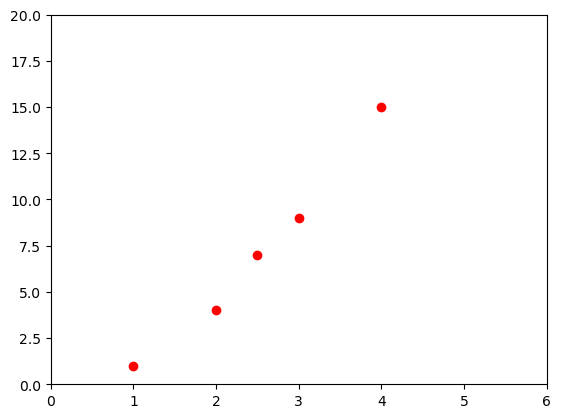

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])

# 1.1 Linear Regression

In [1]:
import keras as ks

C:\Users\mdram\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

The ---titanic data--- has been split into two groups:
- training set (train.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

- test set (test.csv)
The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

In [19]:
## Loading data
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dftest = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
y_train = dftrain.pop('survived')
y_test = dftest.pop('survived')


In [22]:
dftrain.head(10)

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
5,male,2.0,3,1,21.0750,Third,unknown,Southampton,n
6,female,27.0,0,2,11.1333,Third,unknown,Southampton,n
7,female,14.0,1,0,30.0708,Second,unknown,Cherbourg,n
8,female,4.0,1,1,16.7000,Third,G,Southampton,n
9,male,20.0,0,0,8.0500,Third,unknown,Southampton,y


In [25]:
dftrain.describe(), dftrain.describe

(              age  n_siblings_spouses       parch        fare
 count  627.000000          627.000000  627.000000  627.000000
 mean    29.631308            0.545455    0.379585   34.385399
 std     12.511818            1.151090    0.792999   54.597730
 min      0.750000            0.000000    0.000000    0.000000
 25%     23.000000            0.000000    0.000000    7.895800
 50%     28.000000            0.000000    0.000000   15.045800
 75%     35.000000            1.000000    0.000000   31.387500
 max     80.000000            8.000000    5.000000  512.329200,
 <bound method NDFrame.describe of         sex   age  n_siblings_spouses  parch     fare   class     deck  \
 0      male  22.0                   1      0   7.2500   Third  unknown   
 1    female  38.0                   1      0  71.2833   First        C   
 2    female  26.0                   0      0   7.9250   Third  unknown   
 3    female  35.0                   1      0  53.1000   First        C   
 4      male  28.0     

In [27]:
dftrain.info(),dftrain.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 627 non-null    object 
 1   age                 627 non-null    float64
 2   n_siblings_spouses  627 non-null    int64  
 3   parch               627 non-null    int64  
 4   fare                627 non-null    float64
 5   class               627 non-null    object 
 6   deck                627 non-null    object 
 7   embark_town         627 non-null    object 
 8   alone               627 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 44.2+ KB


(None, (627, 9))

In [28]:
dftest.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,male,54.0,0,0,51.8625,First,E,Southampton,y
2,female,58.0,0,0,26.5500,First,C,Southampton,y
3,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,male,34.0,0,0,13.0000,Second,D,Southampton,y


# 1.2 Classification